# A Novel Active Queue Management Scheme for Programmable Data Planes using P4

## Abstract
For supporting different applications requirments the network programmability brings flexibility, agility and rapid introduction of new capabilities. Siginificant benefits like Quality of Service QoS can be acheived by using programmable traffic management at data plane. To acheive the QoS in Term of minimum queuing delay we used the P4 which is a domain specific language for programming network switches. we implement our novel active queue management (NAQM) scheme by manipulationg the bits at data plane and we can see in results that our proposed scheme is better in term of less less queuing delay.

## 1 INTRODUCTION
Centralization of the network’s intelligence in Software Defined Networking (SDN) is an advantage for applications that do not have strict real-time requirements and depend on global network state. However, when the service uses local state information, e.g., to support QoS, the same level of flexibility must be supported at the data plane. Making stateful data plane algorithms programmable, complementing existing programmable forwarding plane solutions, can be beneficial in terms of meeting QoS requirements, reduce the control load on the SDN controller(s) and network overhead, and enhance network flexibility by enabling customized traffic management. Programmable data plane solutions such as P4 and supported architectures, provide an excellent way to define the packet forwarding behavior of network devices. However, most programmable devices still typically have non-programmable traffic managers. The P4 open source community has recently started working towards defining a P4 programmable traffic manager, encompassing functionality such as packet scheduling, shaping, policing etc. However, traffic management is still not programmable for P4 targets. Towards providing fully programmable and customized data planes, we present our initial effort to complement the suite of NAQM schemes using the P4 domain specific language for programming network switches (such as in [6]). Our approach builds on the premise that an SDN data path is a very fast and efficient engine to perform low level primitive operations at wire speed. We implement a modern NAQM algorithm, namely PI2 [3], that can be deployed using basic bit manipulations, while other P4 NAQM implementationsrequire more complex approximation operations, external hardware function support or P4 longest prefix match-mapping tables. We verify the design through a proof of concept implementation.

## 2 BACKGROUND
P4 is a declarative language for programming protocol-independent packet processors, with constructs optimized for packet forwarding functions. Using P4, developers can program data plane packet pipelines, on a variety of targets (e.g., ASICs, FPGAs etc.) based on a match/action architecture. While the P4 language is targetindependent, a P4 compiler translates P4 programs into the instruction set of the hardware of the packet processor. The current specification of the language (P4_16), introduced the concept of the P4 architecture that defines the P4-programmable blocks of a target and their data plane interfaces. The standard P4_16 architecture called Portable Switch Architecture (PSA) was published in November 2018. We use the open source software switch BMV2, since it constitutes the reference software implementation of the PSA. However, at the moment only a partial implementation is available. Therefore we adopt the v1model, a description written in P4_16 of the old fixed architecture implied by P4_14, as it is fully supported by BMV2 [1].



## 3 SYSTEM DESIGN
The BMV2 switch buffers packets between the ingress and egress pipeline using an egress queue per port. Using the v1model architecture, a P4 program can access in the egress pipeline the queuing delay for a packet and related queuing information, as part of the standard packet metadata. Therefore the PI2 NAQM in our case is integrated into the P4 egress pipeline as denoted in Fig. 1. The NAQM can be deployed on any Linux based system without the need of specialized hardware or proprietary software. The implementation serves as a proof of concept for deploying a custom AQM using P4.
#### Ingress Control Flow:
Match-action tables are the mechanism for performing packet processing. The ingress pipeline uses one match action table to implement basic L3-forwarding.
#### Egress Control Flow:
A second match-action table is introduced that applies the NAQM, complemented with the PI2 configuration parameters. The switch upon matching the port number executesthe update_PI2 action [5]. Configuration parameters include the queuing delay target in µs, PI2 gain factors (α and β) and the PI update interval T in exponent(2) µs. A sample static rule used by the control plane to populate the table is provided in Listing 1. The PI gain factors are set to α = 0.3125Hz and β = 3.125Hz according to the stability analysis for RTTs up to 100 ms and an update time of around 33ms (typically 1/3th of the max RTT). Fixed calculations and conversions on parameters are performed by the controller to avoid repetitive per packet processing. So the actual input values for the P4 program are scaled to fit in a 32-bit integer value. The delay target is set to 20,000 µs



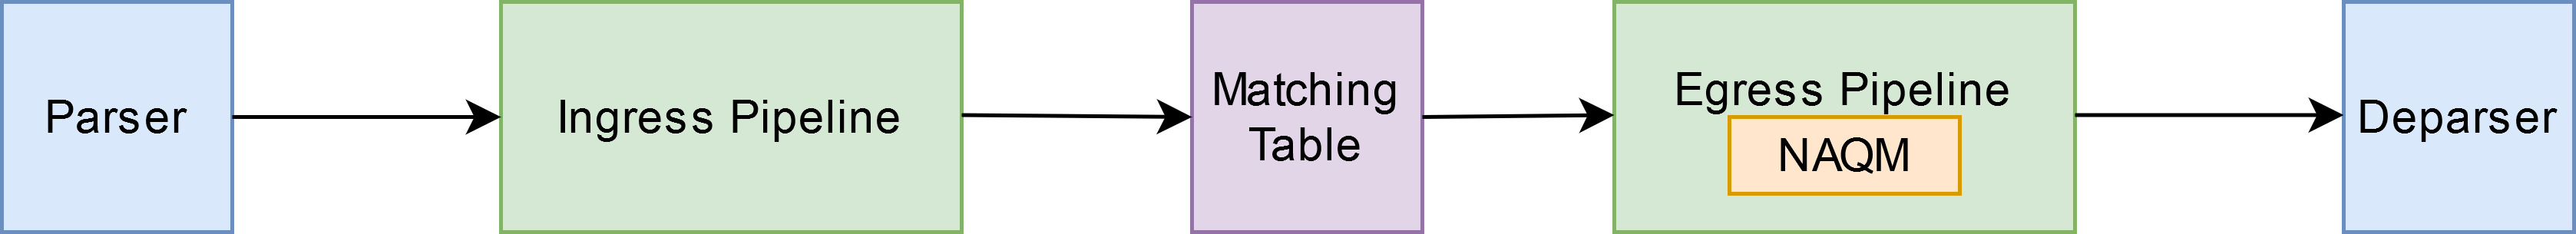

In [1]:
from IPython.display import Image

Image('/home/sajib/Downloads/meer/1.jpg')

###### Figure 1: NAQM in V1 model

#### Discussion:
The current P4 abstraction model poses several challenges for implementing an NAQM scheme. The absence of floating point types required careful mapping into integer types, while the lack of support for complex arithmetic functions can be tackled
with the use of smart bit manipulations or external approximation functions supported by the hardware. Authors in [6] employed the P4 longest prefix match table feature to map approximations for the square root. Our implementation does not require such resources which otherwise would constrain the forwarding functionality.

## 4  [System Setup and Results](https://github.com/Meerkhan12/Reproducible-research/tree/master/testbed)
In the current section we illustrate the functionality of our P4- programmable NAQM scheme using some simple test cases.
Evaluation Environment: Our sytem setup consists of 3 machines with at least two 1Gbps interfaces as shown in Fig. 2. The configuration parameters for the PI2 NAQM algorithm are provided in Listing 1. We compare PI2 with a existing queue scheme that requires a buffer of 200 packets, assuming a reference link of 120Mbps and a delay target of 20ms. For the PI2 AQM we set the buffer size high enough (10,000 packets) to make sure that the only congestion control is performed by the AQM. The target delay can be modified without impacting other control parameters (we use 5ms and 20ms). The P4 switch can limit the rate of packets emitted from the egress pipeline, emulating different link capacities. We use this configuration option to set the rate limit. A base RTT is established by setting a 5ms delay on the interfaces of the client and server machines. A single greedy TCP flow is running and the network queuing delay is shown during its steady state phase over an interval of 250 sec (average values over 1 second intervals).
#### Evaluation Results:
I will add my results here after the simulation. Some part of my code is remaining so that after that results will be added here.


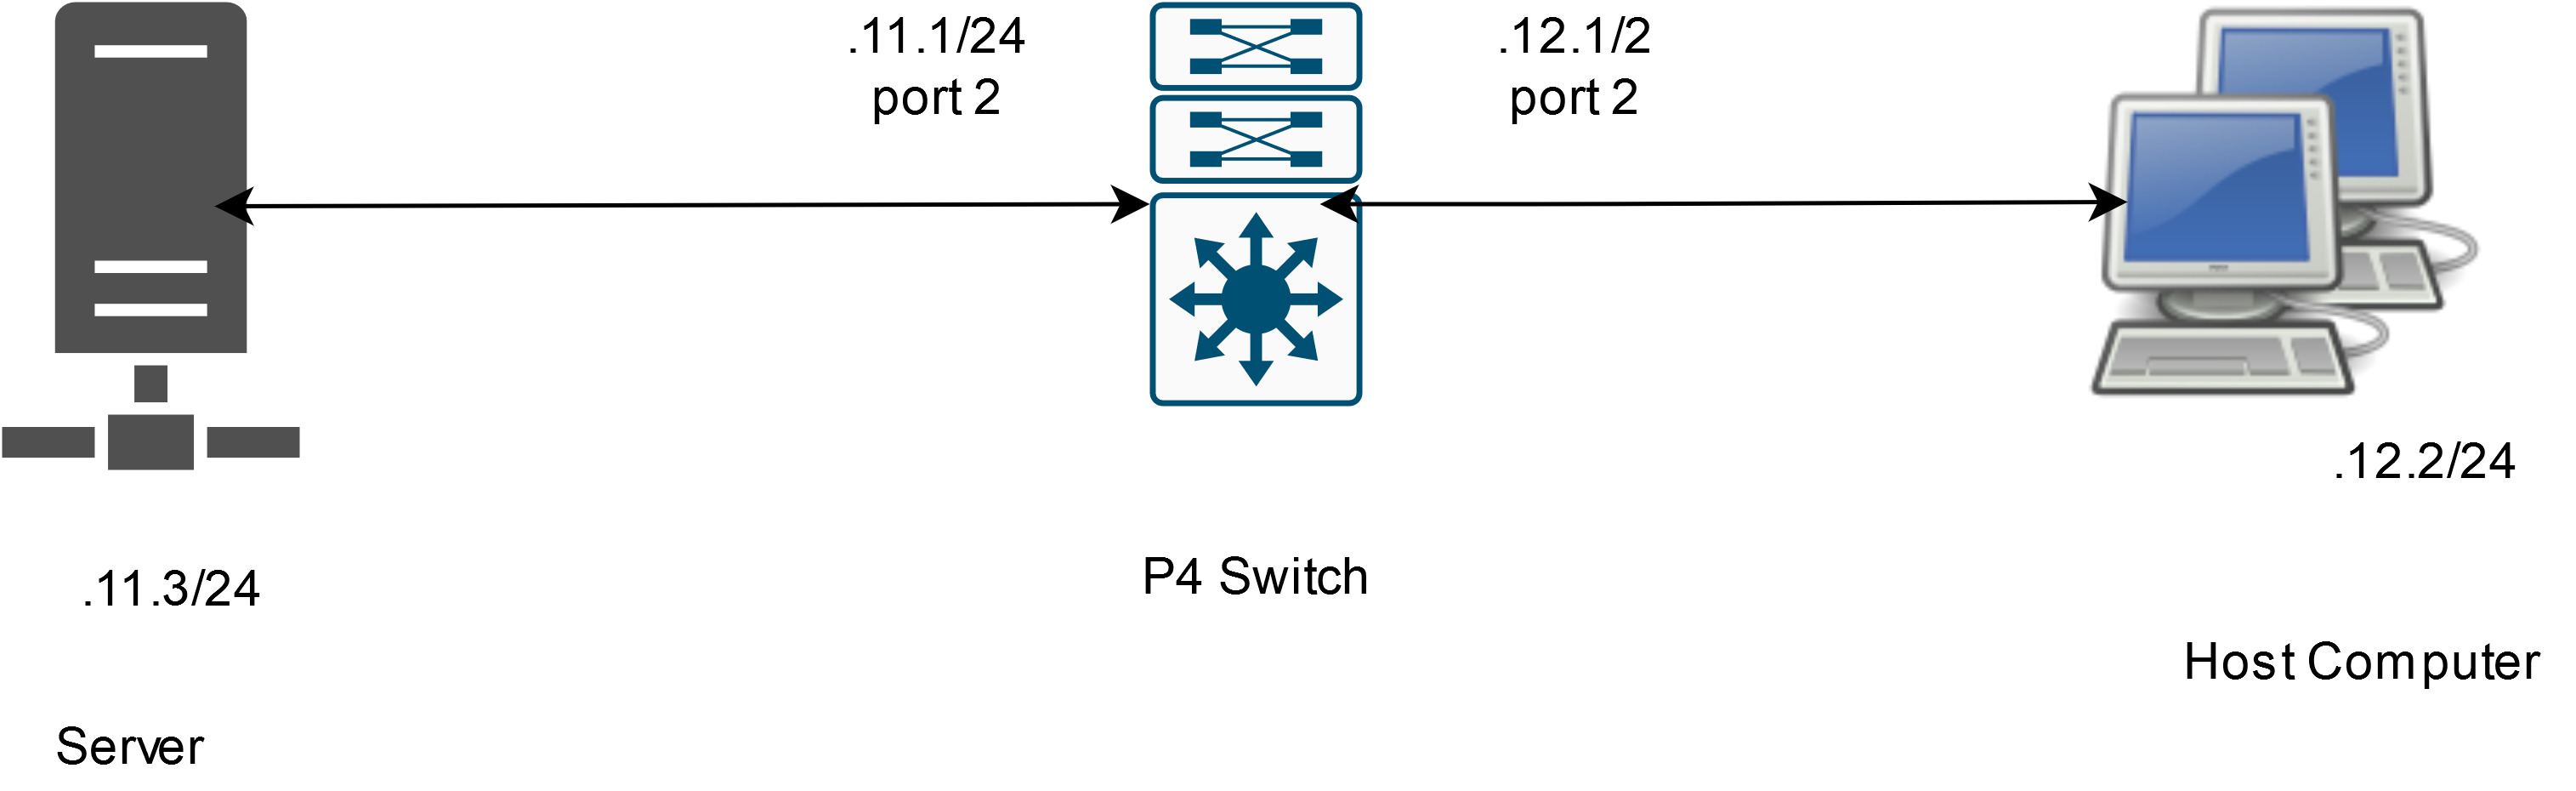

In [2]:
from IPython.display import Image

Image('/home/sajib/Downloads/meer/2.jpg')

##### Figure 2: System Setup

## 5  Conclusion and Future Work

Due to its isolation features, network slicing is a great opportunity to further customize per-slice network behavior. Next to NAQMs, we believe additional per-slice protocol customization and real-time network-service interactions are required enablers to deal with future network challenges. This will require an agile and flexible programmable data-plane beyond the current forwarding and traffic management scope.


## REFERENCES
[1] Antonin Bas. [n. d.]. The P4 behavioral model version 2. https://github.com/ p4lang/behavioral-model [Online; Retrieved  2019].

[2] Pat Bosshart, Dan Daly, Glen Gibb, Martin Izzard, Nick McKeown, Jennifer Rexford, Cole Schlesinger, Dan Talayco, Amin Vahdat, George Varghese, and David
Walker. 2014. P4: Programming Protocol-independent Packet Processors. SIGCOMM Comput. Commun. Rev. 44, 3 (July 2014), 87–95.

[3] Koen De Schepper, Olga Bondarenko, Ing-Jyh Tsang, and Bob Briscoe. 2016.
PI 2: A Linearized AQM for both Classic and Scalable TCP. In Proceedings of
the 12th International on Conference on emerging Networking EXperiments and
Technologies. ACM, 105–119.

[4] The P4.org Architecture Working Group. 2018. P416 Portable Switch Architecture
v1.1. https://p4.org/p4-spec/docs/PSA-v1.1.0.html [Online; posted Nov 2018].

[5] Chrysa Papagianni Koen De Schepper. 2019. PI2 for P4. https://github.com/
acnbell/pi2forp4

[6] Ralf Kundel, Jeremias Blendin, Tobias Viernickel, Boris Koldehofe, and Ralf Steinmetz. 2018. P4-CoDel: Active Queue Management in Programmable Data Planes.
In Proceedings of the IEEE 2018 Conference on Network Functions Virtualization
and Sofwtare Defined Networks. IEEE, 27–29.